In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
import os
import re
from glob import glob
import numpy as np

In [3]:
folder = 'D:/OneDrive - Universidad Complutense de Madrid (UCM)/Doctorado/Curriculum_Learning/Easy_Multidigit_Addition_Decimal/'
folder_specific = f'{folder}v1-Balanced_Frequencies/'

epsilons = [0.1, 0.2, 0.3, 0.5, 0.7,
            1, 1.5,
            2, 2.5,
            3,
            5, 
            7.5,
            10
           ]

#epsilons_2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
#            1, 1.2, 1.5, 1.7,
#            2, 2.5,
#            3, 3.5,
#            4, 4.5,
#            5, 5.5,
#            6, 6.5,
#            7, 7.5,
#            8, 8.5,
#            9, 9.5,
#            10
#           ]

for epsilon in epsilons:
    root_folder = f'{folder_specific}Results_models/AP_{epsilon}'
    
    output_dir = f'{folder_specific}Analyzed_data'
    
    model_pattern = r'\d{4}_\d{2}_\d{2}_\d{2}_\d{2}_\d{2}'
    correct_pattern_test = r'Correct predictions test: (\d+)'
    correct_pattern = r'Correct predictions: (\d+),'
    loss_pattern = r'Loss: ([\d\.]+),'
    
    all_data = []
    
    for file_path in glob(os.path.join(root_folder, '**', '*.txt'), recursive=True):
        with open(file_path, 'r') as file:
            lines = file.readlines()
        file_name = os.path.basename(file_path)
        model_match = re.search(model_pattern, file_name)
        if model_match:
            current_model = model_match.group(0)
                
        for line in lines:       
            correct_match_test = re.search(correct_pattern_test, line)
            
            if correct_match_test:
                current_predictions_test = int(correct_match_test.group(1))
    
            correct_match = re.search(correct_pattern, line)
            if correct_match:
                current_predictions = int(correct_match.group(1))        
            
            loss_match = re.search(loss_pattern, line)
            if loss_match:
                current_loss = float(loss_match.group(1))
                current_predictions_train = current_predictions - current_predictions_test
                all_data.append({
                    'model': current_model,
                    'loss': current_loss,
                    'correct_predictions_train': current_predictions_train,
                    'correct_predictions_test': current_predictions_test
                })
    
    df_all_stages = pd.DataFrame(all_data)
    output_file = f'{output_dir}/all_results-AP_{epsilon}.csv'
    print(f'File all_results-AP_{epsilon}.csv saved.')
    
    os.makedirs(output_dir, exist_ok=True)
    df_all_stages.to_csv(output_file, sep=';', decimal=',', index=False)
    
    output_file

File all_results-AP_0.1.csv saved.
File all_results-AP_0.2.csv saved.
File all_results-AP_0.3.csv saved.
File all_results-AP_0.5.csv saved.
File all_results-AP_0.7.csv saved.
File all_results-AP_1.csv saved.
File all_results-AP_1.5.csv saved.
File all_results-AP_2.csv saved.
File all_results-AP_2.5.csv saved.
File all_results-AP_3.csv saved.
File all_results-AP_5.csv saved.
File all_results-AP_7.5.csv saved.
File all_results-AP_10.csv saved.


In [38]:
epsilon = '10'
variables = ['loss','correct_predictions_train','correct_predictions_test']

for variable in variables:
    df = pd.read_csv(f'D:/OneDrive - Universidad Complutense de Madrid (UCM)/Doctorado/Curriculum_Learning/Multidigit_Addition_Decimal/SAVE_Fast_Analysis/Analyzed_data/all_results-AP_{epsilon}.csv', delimiter=';', decimal=',')
    
    models = df['model'].unique()
    
    for model in models:
        # Filtrar los datos para el modelo y etapa actuales
            filtered_df = df[(df['model'] == model)]
            # Si no hay datos para esta combinación de modelo, continuar con el siguiente
            if filtered_df.empty:
                print('Oh oh, continue :(')
                continue
            
            output_dir = f'D:/OneDrive - Universidad Complutense de Madrid (UCM)/Doctorado/Curriculum_Learning/Multidigit_Addition_Decimal/SAVE_Fast_Analysis/Visual_results/AP_{epsilon}/{variable}'
                    
            os.makedirs(output_dir, exist_ok=True)
            
            # Configurar la figura
            plt.figure()
            
            # Representar la evolución de 'loss'
            plt.plot(range(1, len(filtered_df) + 1), filtered_df[variable], marker='o')
            
            # Añadir título y etiquetas
            plt.title(f'Evolution of {variable} - Model: {model}')
            plt.xlabel('Training')
            plt.ylabel(variable)
            
            # Guardar la gráfica en la carpeta especificada
            output_path = os.path.join(output_dir, f'{variable}_{model}.png')
            plt.savefig(output_path)
            
            # Cerrar la figura para liberar memoria
            plt.close()
    
    print('Done')

Done
Done
Done


<Figure size 600x400 with 0 Axes>

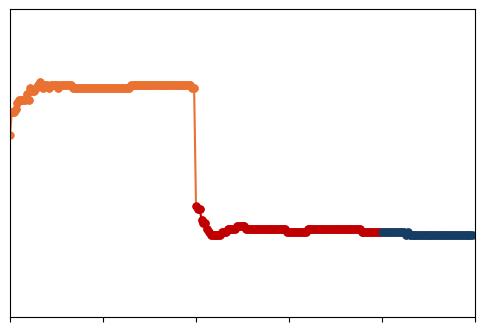

In [139]:
type_training = 'Stages'
name = 'AP_0.1_0.1'
model = '2024_11_08_00_23_49'
stage = 5

df = pd.read_csv(f'D:/OneDrive - Universidad Complutense de Madrid (UCM)/Doctorado/Curriculum_Learning/Analyzed_data/all_Easy_examples_{type_training}_results_{name}.csv', delimiter=';', decimal=',')

filtered_df = df[(df['model'] == model) & (df['stage'] == stage)]

# Extender los valores de correct_predictions hasta x = 250
correct_predictions = filtered_df['correct_predictions'].tolist()
if len(correct_predictions) < 250:
    last_value = correct_predictions[-1]  # Último valor disponible
    correct_predictions.extend([last_value] * (250 - len(correct_predictions)))  # Rellenar con el último valor

# Graficar
plt.figure(figsize=(6, 4))
def get_color(value):
    if value <= 100:
        return (233/255, 113/255, 50/255)  # Color para 0-100
    elif value <= 200:
        return (192/255, 0/255, 0/255)  # Color para 100-200
    else:
        return (22/255, 62/255, 100/255)  # Color para 200-250

# Graficar
plt.figure(figsize=(6, 4))
for i in range(1, 250):
    color = get_color(i)
    plt.plot([i-1, i], [correct_predictions[i-1], correct_predictions[i]], color=color, marker='o', markersize=5)

#plt.xlabel('Training step', fontsize=22)
#plt.ylabel('Correct predictions', fontsize=22)
plt.yticks([])  # Eliminar yticks
plt.ylabel('')   # Eliminar ylabel
plt.xlabel('')
plt.xticks(np.arange(0, 251, step=50), [])
plt.ylim(0, 105)
plt.xlim(0, 250)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.show()